<a href="https://www.tamuc.edu"><img src="https://www.tamuc.edu/wp-content/uploads/2019/08/Stacked-ClearSpace.png" width="400" align="center"></a>

<h1><center>Malicious DNS Machine Learning Project</center></h1>


<h4>About this Notebook</h4>
In this notebook, we explore applying machine learning to suspicious DNS queries. This was done for TAMUC CSCI 333 Applied Data Analytics with Python as my final project.

Notebook format based on the one from [IBM ML0101EN - Machine Learning with Python: A Practical Introduction](https://learning.edx.org/course/course-v1:IBM+ML0101EN+3T2018/home)


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#hypothesis_questions">Hypothesis Questions</a></li>
        <li><a href="#understanding_data">Understanding the Data</a></li>
        <li><a href="#reading_data">Reading the data in</a></li>
        <li><a href="#data_exploration">Data Exploration</a></li>
        <li><a href="#kneighbor_model">KNeighbor Model</a></li>
    </ol>
</div>
<br>
<hr>

<h2 id="hypothesis_questions">Hypothesis Questions</h2>

- Can you predict whether or not a domain is malicious simply by using the DNS request/response?
- Is it viable to use this in a typical IDS?
- Why is this not something more common?

### Importing Needed packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

### Downloading Data
To download the data, we will use !wget to download it from the DOI

!wget -O BenignAndMaliciousDataset.csv https://doi.org/10.17632/623sshkdrz.5


<h2 id="understanding_data">Understanding the Data</h2>

### `BenignAndMaliciousDataset.csv`:
We have downloaded a suspect DNS query dataset, **`BenignAndMaliciousDataset.csv`**, which contains DNS query statistics. [Dataset source](https://www.sciencedirect.com/science/article/pii/S2352340921006260)

- **Domain** e.g.
- **DNSRecordType** e.g.
- **MXDnsResponse** e.g.
- **TXTDnsResponse** e.g.
- **HasSPFInfo** e.g.
- **HasDkimInfo** e.g.
- **HasDmarcInfo** e.g.
- **Ip** e.g.
- **DomainInAlexaDB** e.g.
- **CommonPorts** e.g.
- **CountryCode** e.g.
- **RegisteredCountry** e.g.
- **CreationDate** e.g.
- **LastUpdateDate** e.g.
- **ASN** e.g.
- **HttpResponseCode** e.g.
- **RegisteredOrg** e.g.
- **SubdomainNumber** e.g.
- **Entropy** e.g.
- **EntropyOfSubDomains** e.g.
- **StrangeCharacters** e.g.
- **TLD** e.g.
- **IpReputation** e.g.
- **DomainReputation** e.g.
- **ConsonantRatio** e.g.
- **NumericRatio** e.g.
- **SpecialCharRatio** e.g.
- **VowelRatio** e.g.
- **ConsonantSequence** e.g.
- **VowelSequence** e.g.
- **NumericSequence** e.g.
- **SpecialCharSequence** e.g.
- **DomainLength** e.g.
- **Class** e.g.


<h2 id="reading_data">Reading the data in</h2>

In [3]:
df = pd.read_csv("BenignAndMaliciousDataset.csv")

# take a look at the dataset
df.head()

,Domain,DNSRecordType,MXDnsResponse,TXTDnsResponse,HasSPFInfo,HasDkimInfo,HasDmarcInfo,Ip,DomainInAlexaDB,CommonPorts,...,ConsonantRatio,NumericRatio,SpecialCharRatio,VowelRatio,ConsonantSequence,VowelSequence,NumericSequence,SpecialCharSequence,DomainLength,Class
0,4455,A,False,False,False,False,False,16984,False,False,...,0.6,0.1,0.0,0.2,10,4,1,0,134,1
1,4456,A,False,False,False,False,False,16984,False,False,...,0.7,0.1,0.0,0.2,12,2,2,1,123,1
2,4457,A,False,False,False,False,False,16984,False,False,...,0.6,0.2,0.0,0.2,16,2,3,0,150,1
3,4458,A,False,False,False,False,False,16984,False,False,...,0.6,0.1,0.0,0.1,9,1,2,0,122,1
4,4459,A,False,False,False,False,False,16984,False,False,...,0.6,0.2,0.0,0.1,10,2,2,0,151,1


<h2 id="data_exploration">Data Exploration</h2>
Lets first have a descriptive exploration on our data.

In [4]:
# summarize the data
df.describe()

,Domain,Ip,CreationDate,LastUpdateDate,ASN,HttpResponseCode,SubdomainNumber,Entropy,EntropyOfSubDomains,StrangeCharacters,ConsonantRatio,NumericRatio,SpecialCharRatio,VowelRatio,ConsonantSequence,VowelSequence,NumericSequence,SpecialCharSequence,DomainLength,Class
count,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000,90000.000000
mean,44999.500000,13479.648033,1.933611,2.365744,23335.808167,0.667033,103.069200,2.866844,0.003178,3.498011,0.459519,0.144281,0.006526,0.261528,2.719222,1.342756,1.516478,0.112378,26.440422,0.500000
std,25980.906451,4160.266410,1.997232,1.935509,37004.865724,1.203285,4243.802846,0.488291,0.081042,4.471591,0.146031,0.147331,0.026162,0.098600,1.699339,0.554527,1.538932,0.431967,22.341135,0.500003
min,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000
25%,22499.750000,11709.750000,0.000000,0.000000,-1.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.300000,0.000000,0.000000,0.200000,2.000000,1.000000,0.000000,0.000000,15.000000,0.000000
50%,44999.500000,14626.000000,0.000000,4.000000,26228.000000,0.000000,0.000000,3.000000,0.000000,1.000000,0.500000,0.100000,0.000000,0.200000,2.000000,1.000000,1.000000,0.000000,24.000000,0.500000
75%,67499.250000,16984.000000,4.000000,4.000000,26228.000000,2.000000,57.000000,3.000000,0.000000,7.000000,0.600000,0.300000,0.000000,0.300000,3.000000,2.000000,3.000000,0.000000,31.000000,1.000000
max,89999.000000,16984.000000,4.000000,4.000000,398108.000000,5.000000,661909.000000,5.000000,3.000000,124.000000,1.000000,0.800000,0.900000,0.800000,37.000000,7.000000,45.000000,61.000000,153.000000,1.000000


Lets select some features to explore more.

In [5]:
cdf = df[['Domain', 'DNSRecordType', 'MXDnsResponse', 'TXTDnsResponse', 'HasSPFInfo', 'HasDkimInfo', 'HasDmarcInfo', 'Ip', 'DomainInAlexaDB', 'CommonPorts', 'CountryCode', 'RegisteredCountry', 'CreationDate', 'LastUpdateDate', 'ASN', 'HttpResponseCode', 'RegisteredOrg', 'SubdomainNumber', 'Entropy', 'EntropyOfSubDomains', 'StrangeCharacters', 'TLD', 'IpReputation', 'DomainReputation', 'ConsonantRatio', 'NumericRatio', 'SpecialCharRatio', 'VowelRatio', 'ConsonantSequence', 'VowelSequence', 'NumericSequence', 'SpecialCharSequence', 'DomainLength', 'Class']]
cdf.head(9)

,Domain,DNSRecordType,MXDnsResponse,TXTDnsResponse,HasSPFInfo,HasDkimInfo,HasDmarcInfo,Ip,DomainInAlexaDB,CommonPorts,...,ConsonantRatio,NumericRatio,SpecialCharRatio,VowelRatio,ConsonantSequence,VowelSequence,NumericSequence,SpecialCharSequence,DomainLength,Class
0,4455,A,False,False,False,False,False,16984,False,False,...,0.6,0.1,0.0,0.2,10,4,1,0,134,1
1,4456,A,False,False,False,False,False,16984,False,False,...,0.7,0.1,0.0,0.2,12,2,2,1,123,1
2,4457,A,False,False,False,False,False,16984,False,False,...,0.6,0.2,0.0,0.2,16,2,3,0,150,1
3,4458,A,False,False,False,False,False,16984,False,False,...,0.6,0.1,0.0,0.1,9,1,2,0,122,1
4,4459,A,False,False,False,False,False,16984,False,False,...,0.6,0.2,0.0,0.1,10,2,2,0,151,1
5,4460,A,False,False,False,False,False,16984,False,False,...,0.6,0.1,0.0,0.2,9,2,2,0,149,1
6,4461,A,True,False,True,False,False,11562,False,False,...,0.5,0.0,0.0,0.4,1,2,1,0,28,1
7,4462,A,False,False,False,False,False,16984,False,False,...,0.7,0.1,0.0,0.2,10,2,2,1,131,1
8,4463,A,False,False,False,False,False,6808,False,True,...,0.5,0.0,0.0,0.4,3,2,1,0,22,1


we can plot each of these features:

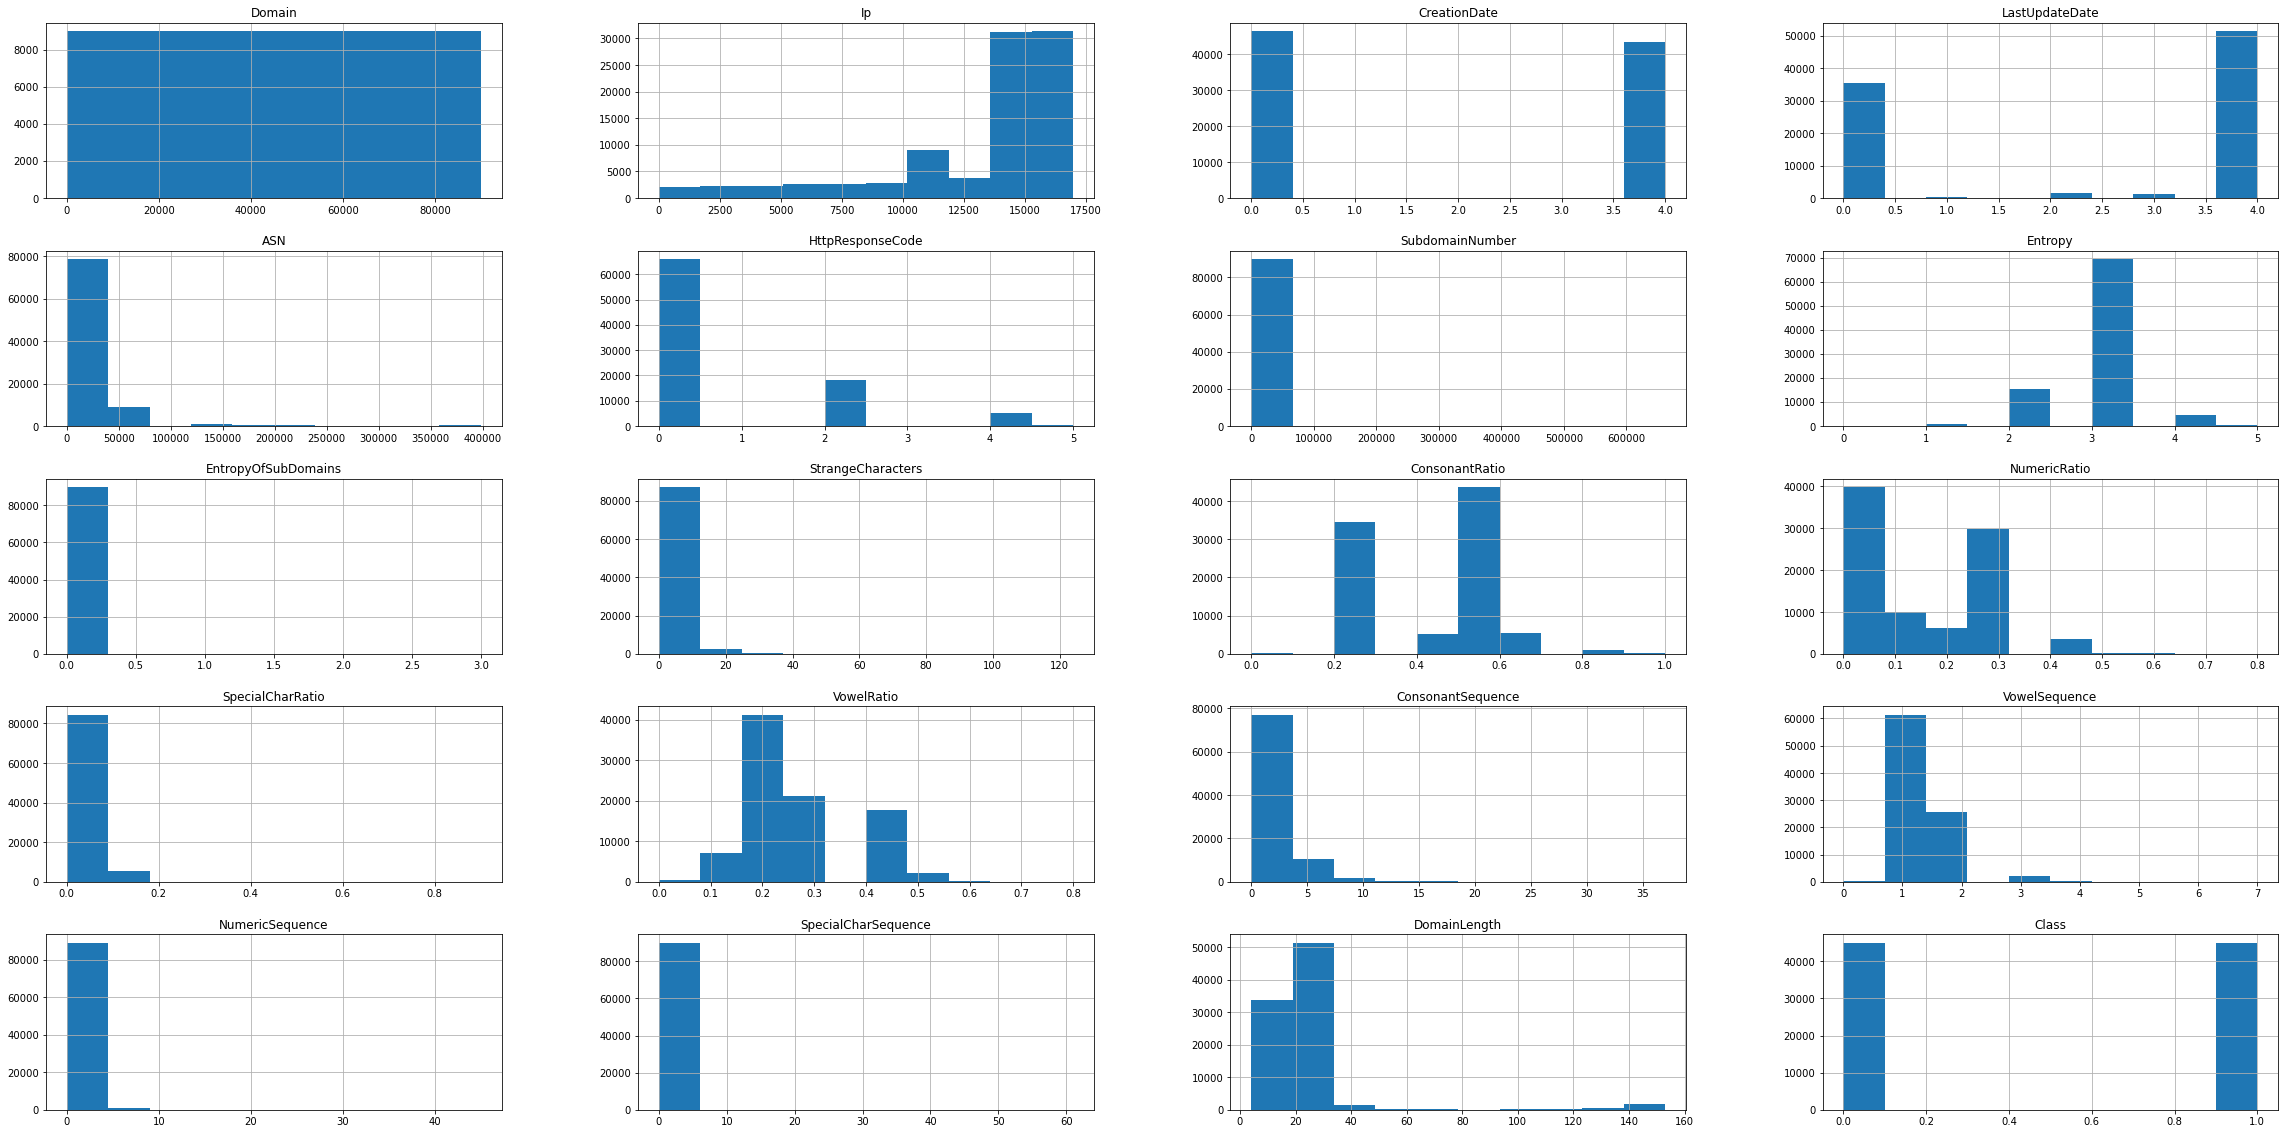

In [6]:
viz = cdf[['Domain', 'DNSRecordType', 'MXDnsResponse', 'TXTDnsResponse', 'HasSPFInfo', 'HasDkimInfo', 'HasDmarcInfo', 'Ip', 'DomainInAlexaDB', 'CommonPorts', 'CountryCode', 'RegisteredCountry', 'CreationDate', 'LastUpdateDate', 'ASN', 'HttpResponseCode', 'RegisteredOrg', 'SubdomainNumber', 'Entropy', 'EntropyOfSubDomains', 'StrangeCharacters', 'TLD', 'IpReputation', 'DomainReputation', 'ConsonantRatio', 'NumericRatio', 'SpecialCharRatio', 'VowelRatio', 'ConsonantSequence', 'VowelSequence', 'NumericSequence', 'SpecialCharSequence', 'DomainLength', 'Class']]
viz.hist(figsize=(40,20))
plt.show()

<h2 id="kneighbor_model">KNeighbor Model</h2>

Now we will import Scikit libraries to implement the KNeighbor model

In [7]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix

In [28]:
# Only use ConsonantRatio, NumericRatio, SpecialCharRatio, VowelRatio, ConsonantSequence, VowelSequence, NumericSequence, SpecialCharSequence, and DomainLength
df_lite = df[['ConsonantRatio', 'NumericRatio', 'SpecialCharRatio', 'VowelRatio', 'ConsonantSequence', 'VowelSequence', 'NumericSequence', 'SpecialCharSequence', 'DomainLength', 'Class']]
df_lite.head()

,ConsonantRatio,NumericRatio,SpecialCharRatio,VowelRatio,ConsonantSequence,VowelSequence,NumericSequence,SpecialCharSequence,DomainLength,Class
0,0.6,0.1,0.0,0.2,10,4,1,0,134,1
1,0.7,0.1,0.0,0.2,12,2,2,1,123,1
2,0.6,0.2,0.0,0.2,16,2,3,0,150,1
3,0.6,0.1,0.0,0.1,9,1,2,0,122,1
4,0.6,0.2,0.0,0.1,10,2,2,0,151,1


In [29]:
# Create X and Y datasets for training
X = np.array(df_lite.drop(['Class'], 1))
y = np.array(df_lite['Class'])

# Split the data into training and testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2)

/tmp/ipykernel_79405/2834179930.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df_lite.drop(['Class'], 1))


In [30]:
# Testing Options
seed = 8
scoring = 'accuracy'

In [31]:
# Define models to train
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(('SVM', SVC()))

# Evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.965500 (0.002013)


In [ ]:
# Make predictions on validation dataset
for name, model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))

In [ ]:
# Graph the accuracy of each model
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()